## Parte 2
- Analise Exploratória (Variáveis Categóricas)
- Tratamento de Valores Missing
- Engenharia de Atributos

In [ ]:
# Variavel DATA_ASSINATURA_CONTRATO possui 1 registro
# Variavel VL_TOTAL_PC_PAGAS possui 4 registros

# Excluindo os registros NA (5 registros)
df_original.dropna(inplace=True)

In [ ]:
# Criando faixa de prazos para utilizarmos no modelo preditivo
bins = [-100, 120, 180, 240]
labels = ['Até 120 Meses', '121 até 180 Meses', '181 até 240 Meses']
df_original['FAIXA_PRAZO_FINANCIAMENTO'] = pd.cut(df_original['PZ_FINANCIAMENTO'], bins=bins, labels=labels)
pd.value_counts(df_original.FAIXA_PRAZO_FINANCIAMENTO)

Até 120 Meses        7402
181 até 240 Meses    2241
121 até 180 Meses     767
Name: FAIXA_PRAZO_FINANCIAMENTO, dtype: int64

In [ ]:
# Criando faixa salarial para utilizarmos no modelo preditivo
bins = [-100, 100000, 200000, 300000, 400000, 500000, 750000, 1000000, 9000000000]
labels = ['Até 100 mil', '101 até 200 mil', '201 até 300 mil', '301 até 400 mil', '401 até 500 mil',
          '501 até 750 mil', 'De 751 até 1.000.000','Mais de 1.000.000']
df_original['FAIXA_VALOR_FINANCIADO'] = pd.cut(df_original['VALOR_FINANCIAMENTO'], bins=bins, labels=labels)
pd.value_counts(df_original.FAIXA_VALOR_FINANCIADO)

201 até 300 mil         3949
301 até 400 mil         2098
101 até 200 mil         1823
401 até 500 mil         1128
501 até 750 mil          915
De 751 até 1.000.000     236
Até 100 mil              167
Mais de 1.000.000         94
Name: FAIXA_VALOR_FINANCIADO, dtype: int64

In [ ]:
# Podemos retirar a variável TIPO FINANCIAMENTO como vimos anteriormente
# Devemos retirar a variável VALOR_FINANCIAMENTO pois criamos uma variavel de faixa de valores para ela.
# Devemos retirar a variável PRAZO_FINANCIAMENTO pois criamos uma variavel de faixa de meses para ela.
# Podemos retirar a variável DATA_ASSINATURA_CONTRATO
# Podemos retirar a variável NUMERO_CONTRATO

colunas = ['TAXA_AO_ANO', 'CIDADE_CLIENTE', 'ESTADO_CLIENTE','RENDA_MENSAL_CLIENTE',
           'QT_PC_ATRASO', 'QT_DIAS_PRIM_PC_ATRASO','QT_TOTAL_PC_PAGAS',
           'VL_TOTAL_PC_PAGAS', 'QT_PC_PAGA_EM_DIA','QT_DIAS_MIN_ATRASO',
           'QT_DIAS_MAX_ATRASO', 'QT_DIAS_MEDIA_ATRASO','VALOR_PARCELA',
           'IDADE_DATA_ASSINATURA_CONTRATO', 'FAIXA_VALOR_FINANCIADO',
           'FAIXA_PRAZO_FINANCIAMENTO','INADIMPLENTE_COBRANCA']

df_dados = pd.DataFrame(df_original, columns=colunas)

In [ ]:
df_dados.head()

,TAXA_AO_ANO,CIDADE_CLIENTE,ESTADO_CLIENTE,RENDA_MENSAL_CLIENTE,QT_PC_ATRASO,QT_DIAS_PRIM_PC_ATRASO,QT_TOTAL_PC_PAGAS,VL_TOTAL_PC_PAGAS,QT_PC_PAGA_EM_DIA,QT_DIAS_MIN_ATRASO,QT_DIAS_MAX_ATRASO,QT_DIAS_MEDIA_ATRASO,VALOR_PARCELA,IDADE_DATA_ASSINATURA_CONTRATO,FAIXA_VALOR_FINANCIADO,FAIXA_PRAZO_FINANCIAMENTO,INADIMPLENTE_COBRANCA
0,15.0,FORTALEZA,CE,4800.0,0,0,97,120078.00,72,3,506,152,471.29,70.0,Até 100 mil,121 até 180 Meses,SIM
1,15.0,SAO PAULO,SP,6800.0,0,0,103,156759.47,42,1,349,93,1858.69,28.0,301 até 400 mil,181 até 240 Meses,SIM
2,18.0,SAO PAULO,SP,6800.0,0,0,98,277125.05,83,1,151,39,3123.57,60.0,501 até 750 mil,181 até 240 Meses,SIM
3,15.0,SAO PAULO,SP,6800.0,0,0,87,351395.19,66,1,3797,206,2873.58,41.0,401 até 500 mil,181 até 240 Meses,SIM
4,17.0,SAO PAULO,SP,6800.0,0,0,71,344249.83,57,1,36,10,4224.03,63.0,501 até 750 mil,181 até 240 Meses,SIM


In [ ]:
df_dados.shape

(10410, 17)

In [ ]:
df_dados.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10410 entries, 0 to 10414
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   TAXA_AO_ANO                     10410 non-null  float64 
 1   CIDADE_CLIENTE                  10410 non-null  object  
 2   ESTADO_CLIENTE                  10410 non-null  object  
 3   RENDA_MENSAL_CLIENTE            10410 non-null  float64 
 4   QT_PC_ATRASO                    10410 non-null  int64   
 5   QT_DIAS_PRIM_PC_ATRASO          10410 non-null  int64   
 6   QT_TOTAL_PC_PAGAS               10410 non-null  int64   
 7   VL_TOTAL_PC_PAGAS               10410 non-null  float64 
 8   QT_PC_PAGA_EM_DIA               10410 non-null  int64   
 9   QT_DIAS_MIN_ATRASO              10410 non-null  int64   
 10  QT_DIAS_MAX_ATRASO              10410 non-null  int64   
 11  QT_DIAS_MEDIA_ATRASO            10410 non-null  int64   
 12  VALOR_PARCELA     

In [ ]:
df_dados.isnull().sum()

TAXA_AO_ANO                       0
CIDADE_CLIENTE                    0
ESTADO_CLIENTE                    0
RENDA_MENSAL_CLIENTE              0
QT_PC_ATRASO                      0
QT_DIAS_PRIM_PC_ATRASO            0
QT_TOTAL_PC_PAGAS                 0
VL_TOTAL_PC_PAGAS                 0
QT_PC_PAGA_EM_DIA                 0
QT_DIAS_MIN_ATRASO                0
QT_DIAS_MAX_ATRASO                0
QT_DIAS_MEDIA_ATRASO              0
VALOR_PARCELA                     0
IDADE_DATA_ASSINATURA_CONTRATO    0
FAIXA_VALOR_FINANCIADO            0
FAIXA_PRAZO_FINANCIAMENTO         0
INADIMPLENTE_COBRANCA             0
dtype: int64

### Analise Exploratória - Variáveis Categóricas
<br>
Nesta analise temos 2 objetivos:<br>
1 - Conhecer como a variável alvo (INADIMPLENTE_COBRANCA) está relacionada com as outras variáveis.<br>
2 - Iremos avaliar as variáveis categóricas para conhecimento dos dados e descartar variáveis que não fazem sentido.

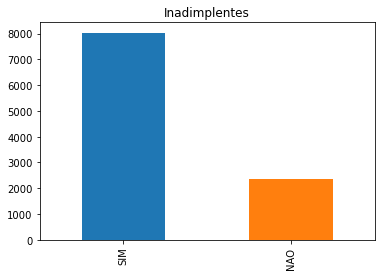

In [ ]:
#Analisando como a variavel alvo está distribuida.
#Aqui podemos observar que há muito mais cotas como INADIMPLENTE
#dessa forma, precisaremos balancear o dataset mais adiante.
df_dados.INADIMPLENTE_COBRANCA.value_counts().plot(kind='bar', title='Inadimplentes',color = ['#1F77B4', '#FF7F0E']);

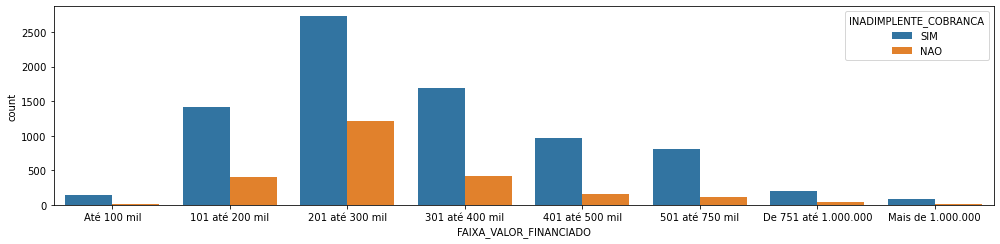

In [ ]:
#Podemos constatar na analise que não há discrepancias nestas variaveis

plt.rcParams["figure.figsize"] = [14.00, 3.50]
plt.rcParams["figure.autolayout"] = True
sns.countplot(data = df_dados, x = "FAIXA_VALOR_FINANCIADO", hue = "INADIMPLENTE_COBRANCA")
plt.show()

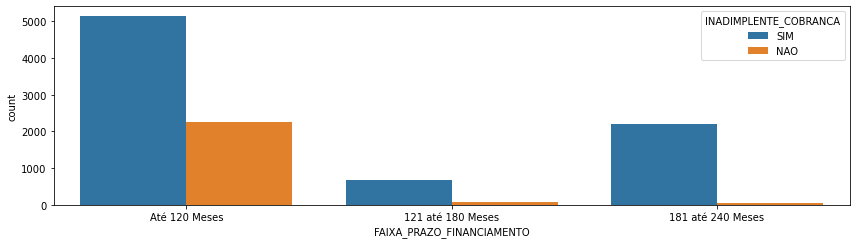

In [ ]:
#Podemos constatar na analise que não há discrepancias nestas variaveis

plt.rcParams["figure.figsize"] = [12.00, 3.50]
plt.rcParams["figure.autolayout"] = True
sns.countplot(data = df_dados, x = "FAIXA_PRAZO_FINANCIAMENTO", hue = "INADIMPLENTE_COBRANCA")
plt.show()